In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
songs=pd.read_csv('songs.csv')
labels=pd.read_csv('song_labels.csv')
save=pd.read_csv('save_for_later.csv')

In [3]:
train.head()
#customer_id: Nominal Categorical

,customer_id,song_id,score
0,O29219,3459,3
1,I50343,5326,4
2,N42888,236,5
3,F5740,724,4
4,K4115,8452,5


In [4]:
test.head()

,customer_id,song_id
0,J24644,5304
1,G29701,123
2,M29977,11
3,H50752,1445
4,J42394,271


In [5]:
songs.head()

,song_id,platform_id,released_year,language,number_of_comments
0,8328,T17332564,2013.0,eng,1936
1,8591,T773514,1925.0,eng,420
2,718,U10975,1929.0,eng,5485
3,6593,Y12839,1968.0,NaN,200
4,743,Q28881,2002.0,en-US,10411


In [6]:
labels.head()

,platform_id,label_id,count
0,Q207781,10304,6
1,S961833,29011,15
2,X6718608,25148,29
3,Q16134551,8717,774
4,V7126,15169,120


In [7]:
save.head()

,customer_id,song_id
0,F22180,1140
1,N34498,1523
2,K46875,6918
3,L50176,5828
4,F13830,3039


In [8]:
train['score'].unique()  #Likert scale: Ordinal Categorical variable

array([3, 4, 5, 2, 1])

In [9]:
len(train),len(test),len(songs),len(labels),len(save)

(710109, 670681, 9981, 999912, 238880)

In [10]:
print(len(train['song_id'].unique()),len(test['song_id'].unique()),len(songs['song_id'].unique()),len(save['song_id'].unique()))

10000 10000 9981 9794


In [11]:
print(len(train['customer_id'].unique()),len(test['customer_id'].unique()),len(save['customer_id'].unique()))

14053 14053 12799


In [12]:
print()

In [13]:
songs['language'].unique()

array(['eng', nan, 'en-US', 'en-GB', 'en-CA', 'por', 'ger', 'rus', 'fre',
       'ara', 'ind', 'jpn', 'dan', 'nor', 'per', 'spa', 'pol', 'en',
       'fil', 'rum', 'ita', 'vie', 'tur', 'swe', 'mul', 'nl'],
      dtype=object)

In [14]:
#train['customer_id'][type(train['customer_id'])==str]
print(train['customer_id'].dtype==str)

False


In [15]:
print(len(songs)==len(songs['song_id'].unique()))
print(len(songs)==len(songs['platform_id'].unique()))
print(len(labels['platform_id'].unique()))

#This shows that 'songs' has only one entry per song. There are 9981 entries in this df, which is very close
#to total number of distinct songs, 10000
#Also, this shows that the platform_id for each song is unique as well

True
True
10000


In [16]:
def checkdtyp(ser):
    count=0
    for i in range(len(ser)):
        comp=ser[0]
        if type(ser[i])!=type(comp):
            count+=1
    if count>0:
        print(count)
    return count==0

In [17]:
print(checkdtyp(train['customer_id']),checkdtyp(train['song_id']),checkdtyp(train['score']))

True True True


In [18]:
print(checkdtyp(test['customer_id']),checkdtyp(test['song_id']))

True True


In [19]:
print(checkdtyp(songs['song_id']),checkdtyp(songs['platform_id']),checkdtyp(songs['released_year']),checkdtyp(songs['language']),checkdtyp(songs['number_of_comments']))

1076
True True True False True


In [20]:
print(checkdtyp(labels['platform_id']),checkdtyp(labels['label_id']),checkdtyp(labels['count']))

True True True


In [21]:
print(checkdtyp(save['customer_id']),checkdtyp(save['song_id']))

True True


In [22]:
print(train['song_id'].isin(list(test['song_id'])).value_counts())
print(songs['song_id'].isin(list(train['song_id'])).value_counts())
print(save['song_id'].isin(list(train['song_id'])).value_counts())
print(train['customer_id'].isin(list(test['customer_id'])).value_counts())
print(save['customer_id'].isin(list(train['customer_id'])).value_counts())
print(labels['platform_id'].isin(list(songs['platform_id'])).value_counts())
print(songs['platform_id'].isin(list(labels['platform_id'])).value_counts())

True    710109
Name: song_id, dtype: int64
True    9981
Name: song_id, dtype: int64
True    238880
Name: song_id, dtype: int64
True    710109
Name: customer_id, dtype: int64
True    238880
Name: customer_id, dtype: int64
True     998012
False      1900
Name: platform_id, dtype: int64
True    9981
Name: platform_id, dtype: int64


In [23]:
print(songs['released_year'].min(),songs['number_of_comments'].min(),labels['count'].min())

-1750.0 3 -1


In [24]:
songs['released_year'][songs['released_year']<1000].value_counts()

-500.0     3
-750.0     2
-458.0     2
-385.0     2
-400.0     2
-350.0     2
-411.0     2
 119.0     1
 800.0     1
 975.0     1
-330.0     1
-560.0     1
-335.0     1
-401.0     1
-390.0     1
-430.0     1
 397.0     1
 609.0     1
-17.0      1
-720.0     1
-380.0     1
 8.0       1
 180.0     1
-300.0     1
-476.0     1
-1750.0    1
-431.0     1
-440.0     1
-441.0     1
Name: released_year, dtype: int64

In [25]:
labels['count'][labels['count']<10].value_counts()

 4    50938
 5    50512
 6    47258
 3    44449
 7    43082
 8    38884
 9    35694
 2    28674
 1    10338
-1        6
Name: count, dtype: int64

In [26]:
print(songs['language'].value_counts())
print(len(songs))

eng      6330
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
por         6
pol         6
en          4
dan         3
nor         3
ita         2
fil         2
vie         1
tur         1
swe         1
nl          1
mul         1
rum         1
rus         1
Name: language, dtype: int64
9981


In [27]:
songs['language'].isna().sum()

1076

In [28]:
print(songs['song_id'][songs['language'].isna()].isin(list(train['song_id'])).value_counts())
print(songs['song_id'][songs['language'].isna()==False].isin(list(train['song_id'])).value_counts())

#All songs in 'songs' are part of the train and test datasets

True    1076
Name: song_id, dtype: int64
True    8905
Name: song_id, dtype: int64


In [29]:
labels['platform_id'][labels['count']<1].isin(list(songs['platform_id'])).value_counts() #Drop these negative values as they
#don't make sense

True    6
Name: platform_id, dtype: int64

In [30]:
#correcting language by random assignment
langlist=list(songs['language'][songs['language'].isna()==False])
songsn=songs.copy()
random.seed(202)
for i in songs['language'][songs['language'].isna()].index:
    songsn.loc[i,'language']=langlist[random.randint(0,len(langlist)-1)]

In [31]:
songsn['language'].isna().value_counts()

False    9981
Name: language, dtype: int64

In [32]:
print(songsn['language'][songs['language'].isna()].value_counts())
print(songs['language'][songs['language'].isna()==False].value_counts())

eng      729
en-US    277
en-GB     48
ara        8
en-CA      6
fre        1
dan        1
spa        1
nl         1
ind        1
vie        1
ger        1
nor        1
Name: language, dtype: int64
eng      6330
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
por         6
pol         6
en          4
dan         3
nor         3
ita         2
fil         2
vie         1
tur         1
swe         1
nl          1
mul         1
rum         1
rus         1
Name: language, dtype: int64


In [33]:
labelsn=labels[labels['count']>0]
print(len(labels),len(labelsn))

999912 999906


In [34]:
print(train['customer_id'].value_counts(sort=True))
print(save['customer_id'].value_counts(sort=True))

J15604    98
F6630     98
N9668     98
I24143    98
O10509    97
          ..
F38280     6
N50918     6
O34099     6
K43675     6
F34590     5
Name: customer_id, Length: 14053, dtype: int64
M38457    117
O28259    114
L38076    110
K46555    107
F46000    107
         ... 
H29242      1
H51742      1
J46904      1
F11180      1
L29656      1
Name: customer_id, Length: 12799, dtype: int64


In [35]:
print(len(labelsn))
abc=labelsn['label_id'].value_counts(sort=True)
abc=abc[abc>1000]
print(len(abc))
print(len(labelsn[labelsn['label_id'].isin(list(abc.keys()))]))
labelsn=labelsn[labelsn['label_id'].isin(list(abc.keys()))]
print(len(labelsn))
print(len(labelsn[labelsn['label_id'].isin(list(abc.keys()))]['platform_id'].unique()))

999906
186
544561
544561
10000


In [36]:
abc=labelsn.set_index('platform_id')
abc.head()
print(abc.loc['P10'][abc.loc['P10']['label_id']==15169])

             label_id  count
platform_id                 
P10             15169      3


In [37]:
label_vector=pd.DataFrame(columns=np.unique(abc.index.values),index=list(abc['label_id'].unique()))
ab=labelsn.set_index('label_id')
#print(ab)
#print(label_vector.loc[10304][list(ab.loc[10304]['platform_id'])])
#print(pd.DataFrame(list(ab.loc[10304]['count']))[0])

df=pd.DataFrame(np.zeros(186),index=list(abc['label_id'].unique()),columns=['DF'])

for i in np.unique(ab.index.values):
    label_vector.loc[i][list(ab.loc[i]['platform_id'])]=list(np.log(ab.loc[i]['count']+1))
    df.loc[i]=ab.loc[i]['count'].sum()
label_vector=label_vector.fillna(0)
#print(label_vector.loc[10304].sum())
#
print(df)
idf=1/(df/df.sum())
idf=np.log(idf)
print(idf)
label_vector=label_vector.T

def normalise(row):
    row=row/np.sqrt(row.mul(row,axis=0).sum())
    
    return (row)
    
label_vector=label_vector.apply(normalise,axis=1)
print(label_vector)


              DF
29011   165139.0
25148   106238.0
8717   7507958.0
15169   184735.0
1540     68941.0
...          ...
17124   118799.0
21274    22590.0
20957    20852.0
1542     28004.0
26842    37143.0

[186 rows x 1 columns]
             DF
29011  7.065261
25148  7.506367
8717   3.248330
15169  6.953126
1540   7.938797
...         ...
17124  7.394616
21274  9.054541
20957  9.134599
1542   8.839701
26842  8.557273

[186 rows x 1 columns]
             29011     25148     8717      15169     1540      6828   \
P10       0.000000  0.000000  0.238243  0.068069  0.000000  0.095548   
P10090    0.000000  0.000000  0.199239  0.090564  0.000000  0.000000   
P102030   0.000000  0.000000  0.291090  0.076366  0.000000  0.000000   
P10210    0.000000  0.111243  0.148236  0.137661  0.000000  0.000000   
P1025250  0.000000  0.000000  0.245321  0.112127  0.000000  0.093119   
...            ...       ...       ...       ...       ...       ...   
Y9917879  0.000000  0.087144  0.228467  0.000000  0.

In [38]:
save=pd.read_csv('save_for_later.csv')

songs=pd.read_csv('songs.csv')
#print(songs)
#print(save)
save['score']=4
lis=list(songs['song_id'].unique())
li=[]
for i in lis:
    if i in list(save['song_id'].unique()):
        li.append(i)

                 
save=save.set_index('song_id')
print(save)
save=save.loc[li]
save['platform_id']=songs.set_index('song_id')['platform_id']

save=save.reset_index()
save.head()


        customer_id  score
song_id                   
1140         F22180      4
1523         N34498      4
6918         K46875      4
5828         L50176      4
3039         F13830      4
...             ...    ...
5662         J52814      4
1216         G35381      4
4581           L716      4
16           I15343      4
7181         H27092      4

[238880 rows x 2 columns]


,song_id,customer_id,score,platform_id
0,8328,H4492,4,T17332564
1,8328,N36198,4,T17332564
2,8328,G47151,4,T17332564
3,8328,I40563,4,T17332564
4,8328,K45425,4,T17332564


In [39]:
print(len(train))

710109


In [40]:
train=pd.read_csv('train.csv')
#train['platform_id']=train['song_id']
songs=pd.read_csv('songs.csv')
print(train.loc[0]['song_id'])
train=train.set_index('song_id')
train=train.loc[list(songs['song_id'].unique())]
train['platform_id']=songs.set_index('song_id')['platform_id']
train=train.reset_index()
print(train)
#songs.set_index('song_id')
#train['platform_id']=songs['platform_id']
#def add_song_ig(row):
 #   row['platform_id']=songs[songs['song_id']==row['song_id']]['platform_id']
 #   return row
#train.apply(add_song_ig,axis=1)

test2=train.loc[600000:].copy()
train2=pd.concat([train[0:600000].copy(), save.copy()])
user_vector=pd.DataFrame(columns=list(abc['label_id'].unique()),index=list(train2['customer_id'].unique()))
print(user_vector)
#users=train2.groupby('customer_id')
users=pd.concat([train.copy(), save.copy()]).groupby('customer_id')
def find_vec(frame):
    temp=label_vector.loc[list(frame['platform_id']),:].mul(list(frame['score']-3),axis=0)
    temp=temp.sum(axis=0)
    return temp/np.sqrt(temp.mul(temp,axis=0).sum())
count=0

for name,frame in users:
    user_vector.loc[name]=find_vec(frame)
    count=count+1
    if(count%1000==0):
        print(count)
        #print(frame['score']-2.5)

print(users)

3459
        song_id customer_id  score platform_id
0          8328      J16874      3   T17332564
1          8328      G35191      4   T17332564
2          8328      M40077      4   T17332564
3          8328      M17487      3   T17332564
4          8328      O42549      3   T17332564
...         ...         ...    ...         ...
709186     8970      K15615      3      U61915
709187     8970      I39733      4      U61915
709188     8970      N21898      4      U61915
709189     8970      N18298      4      U61915
709190     8970       M2527      3      U61915

[709191 rows x 4 columns]
       29011 25148 8717  15169 1540  6828  25765 27199 25147 24996  ... 8533   \
J16874   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
G35191   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
M40077   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
M17487   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

In [41]:
user_means=pd.DataFrame(np.zeros(14053),index=list(train2['customer_id'].unique()))
song_means=pd.DataFrame(np.zeros(10000),index=np.unique(abc.index.values))
user_std=pd.DataFrame(np.zeros(14053),index=list(train2['customer_id'].unique()))
song_std=pd.DataFrame(np.zeros(10000),index=np.unique(abc.index.values))
for_means=train[0:600000].copy()
user_m=train.groupby('customer_id')
song_m=train.groupby('platform_id')
count=0
for name,frame in user_m:
    user_means.loc[name]=frame['score'].mean()
    user_std.loc[name]=frame['score'].std()
    count=count+1
    if(count%3000==0):
        print(count)
        
count=0
for name,frame in song_m:
    song_means.loc[name]=frame['score'].mean()
    song_std.loc[name]=frame['score'].std()
    count=count+1
    if(count%3000==0):
        print(count)
     

3000
6000
9000
12000
3000
6000
9000


In [42]:
print(user_means)
print(song_means)
print(song_std)
len(train)

               0
J16874  3.888889
G35191  4.095238
M40077  4.106061
M17487  4.084746
O42549  3.823529
...          ...
G47061  3.000000
J43544  4.625000
N33108  4.222222
O44589  3.375000
O38669  4.500000

[14053 rows x 1 columns]
                 0
P10       4.833333
P10090    3.500000
P102030   4.222222
P10210    3.996667
P1025250  4.208333
...            ...
Y9917879  3.833333
Y99219    3.814815
Y99329    3.566667
Y9975679  3.777778
Y9975779  4.200000

[10000 rows x 1 columns]
                 0
P10       0.379049
P10090    1.269296
P102030   0.732084
P10210    1.023488
P1025250  0.658005
...            ...
Y9917879  1.049500
Y99219    1.075498
Y99329    1.040004
Y9975679  0.942809
Y9975779  0.767772

[10000 rows x 1 columns]


709191

In [43]:
train2=pd.concat([train.copy(), save.copy()])
print(len(train2))

947797


In [44]:
users_z=pd.read_csv('users_nz.csv')
songs_z=pd.read_csv('songs_nz.csv')
users_z=users_z.set_index('customer_id')
songs_z=songs_z.set_index('song_id')
print(users_z)
print(songs_z)



                    0         1         2         3         4         5  \
customer_id                                                               
F100         0.010242 -0.000753 -0.014312 -0.006872 -0.001490 -0.003498   
F10040      -0.001778 -0.000850 -0.001954 -0.004542 -0.007145 -0.010287   
F10050      -0.008645 -0.021335 -0.009117  0.005265  0.015720 -0.002987   
F10070      -0.000540  0.002795 -0.002355  0.005361  0.000763 -0.000851   
F1010        0.009594  0.005321  0.009611  0.003475 -0.004796  0.009057   
...               ...       ...       ...       ...       ...       ...   
O9839        0.002988  0.007462 -0.005064 -0.010621 -0.008965  0.000502   
O9849       -0.014959 -0.011841 -0.050719 -0.016805  0.014917 -0.050057   
O9909        0.048100 -0.039227  0.002537  0.025191 -0.004189  0.013719   
O9939        0.002914  0.006536 -0.004137 -0.006616 -0.005006 -0.002420   
O9999        0.007448 -0.003595 -0.003103 -0.005686  0.007181 -0.000444   

                    6   

In [45]:
#print(user_vector)

x_train=np.zeros(shape=(len(train2),576))
y_train=np.zeros(len(train2)).astype(int)
songs=pd.read_csv('songs.csv')
songs=songs.set_index('song_id')
for i in range(len(train2)):
    row=train2.iloc[i]
    if(row['song_id'] in songs.index.values):
        plat=songs.loc[row['song_id']]['platform_id']
        x_train[i,:]=np.append(np.concatenate((np.array(user_vector.loc[row['customer_id']]),np.array(users_z.loc[row['customer_id']]),np.array(label_vector.loc[plat]),np.array(songs_z.loc[row['song_id']]))),[user_means.loc[row['customer_id']],song_means.loc[plat],user_std.loc[row['customer_id']],song_std.loc[plat]])
    y_train[i]=row['score'].astype(int)
    if(i%10000==0):
        print(i)
        #print(x_train[i])
        #print(user_vector.loc[row['customer_id']])
        #print(label_vector.loc[plat])
    i=i+1    


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000


In [46]:
x_test=np.zeros(shape=(len(test2),576))
y_test=np.zeros(len(test2)).astype(int)
songs=pd.read_csv('songs.csv')
songs=songs.set_index('song_id')
for i in range(len(test2)):
    row=test2.iloc[i]
    if(row['song_id'] in songs.index.values):
        plat=songs.loc[row['song_id']]['platform_id']
        x_test[i,:]=np.append(np.concatenate((np.array(user_vector.loc[row['customer_id']]),np.array(users_z.loc[row['customer_id']]),np.array(label_vector.loc[plat]),np.array(songs_z.loc[row['song_id']]))),[user_means.loc[row['customer_id']],song_means.loc[plat],user_std.loc[row['customer_id']],song_std.loc[plat]])
        y_test[i]=row['score'].astype(int)
    if(i%10000==0):
        print(i)
        #print(y_test[i])
        #print(user_vector.loc[row['customer_id']])
        #print(label_vector.loc[plat])
    i=i+1    
        
print(x_train)
print(y_train)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
[[0.03205084 0.07011752 0.23521014 ... 3.5625     0.64032464 1.15289491]
 [0.05109886 0.03238088 0.22926105 ... 3.5625     0.70034005 1.15289491]
 [0.0708555  0.09039431 0.20270864 ... 3.5625     0.70446462 1.15289491]
 ...
 [0.01766109 0.02494931 0.24435711 ... 3.61538462 0.97026499 0.65044364]
 [0.04016086 0.01466467 0.24131474 ... 3.61538462 0.82093008 0.65044364]
 [0.01956676 0.04701982 0.24018772 ... 3.61538462 0.87767292 0.65044364]]
[3 4 4 ... 4 4 4]


In [47]:
print(train2)
print(x_train.shape)
print(y_train.shape)
#plat='T17332564'
#print(np.concatenate((np.array(user_vector.loc['J16874']),np.array(label_vector.loc[plat]))))

        song_id customer_id  score platform_id
0          8328      J16874      3   T17332564
1          8328      G35191      4   T17332564
2          8328      M40077      4   T17332564
3          8328      M17487      3   T17332564
4          8328      O42549      3   T17332564
...         ...         ...    ...         ...
238601     8970      H13972      4      U61915
238602     8970      I10223      4      U61915
238603     8970      H27272      4      U61915
238604     8970      G42101      4      U61915
238605     8970      L31856      4      U61915

[947797 rows x 4 columns]
(947797, 576)
(947797,)


In [189]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [161]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)


In [170]:
def feat(row):
    if(row['song_id'] in songs.index.values):
        plat=songs.loc[row['song_id']]['platform_id']
        return np.append(np.array(user_vector.loc[row['customer_id']].mul(label_vector.loc[plat],axis=0)),[user_means.loc[row['customer_id']],song_means.loc[plat]])
    else:
        return np.zeros(shape=(1,188))
ddd=np.zeros(shape=(len(test2),188))
pred=test2['score'].copy()

for i in range(len(test2)):
    row=test2.iloc[i]
    ddd=np.zeros(shape=(1,188))
    ddd=feat(row)
    if(ddd.max()==0):
        pred.iloc[i]=3
        continue
    probs=model.predict_proba(ddd.reshape(1,-1))
    
    pred.iloc[i]=probs[:,0]*1+probs[:,1]*2+probs[:,2]*3+probs[:,3]*4+probs[:,4]*5
    if(i%10000==0):
        print(i)
            

NameError: name 'model' is not defined

In [163]:
train=pd.read_csv('train.csv')
#train['platform_id']=train['song_id']
test=pd.read_csv('test.csv')
songs=pd.read_csv('songs.csv')
train=train.set_index('song_id')
train=train.loc[list(songs['song_id'].unique())]
train['platform_id']=songs.set_index('song_id')['platform_id']
train=train.reset_index()
test2=train.loc[500000:]
train=train.loc[0:500000]
print(pred.max())
print(pred)
pred2=test2['score']
error=(pred-pred2)
print(error)
error=error.mul(error,axis=0)

print(error.sum()/len(error))


4.87604660313381
500000    3.462462
500001    3.179142
500002    4.247151
500003    4.714138
500004    2.968923
            ...   
709186    3.409449
709187    3.407361
709188    3.685566
709189    3.735673
709190    3.972605
Name: score, Length: 209191, dtype: float64
500000    1.462462
500001    0.179142
500002    0.247151
500003   -0.285862
500004    0.968923
            ...   
709186    0.409449
709187   -0.592639
709188   -0.314434
709189   -0.264327
709190    0.972605
Name: score, Length: 209191, dtype: float64
0.7684465716593326


In [48]:
import xgboost as xgb
from xgboost import XGBClassifier
model_xbg_save = XGBClassifier()
model_xbg_save.fit(x_train, y_train)

/home/atharva1511/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:48:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
print(x_test)
pred_xbg_save= model_xbg_save.predict_proba(x_test)
from sklearn.metrics import mean_squared_error

print(pred_xbg_save)
preds_xbg_save=pred_xbg_save[:,0]*1+pred_xbg_save[:,1]*2+pred_xbg_save[:,2]*3+pred_xbg_save[:,3]*4+pred_xbg_save[:,4]*5
print(preds_xbg_save)
mean_squared_error(y_test, preds_xbg_save)
#test3=pd.read_csv('test.csv')
#print(test3)

[[0.0233978  0.02784851 0.24129857 ... 3.68217054 0.58824953 0.98412791]
 [0.02825864 0.03389148 0.23111732 ... 3.68217054 0.88864084 0.98412791]
 [0.05545051 0.01704436 0.22247312 ... 3.68217054 0.91061812 0.98412791]
 ...
 [0.01833909 0.03901991 0.25817951 ... 3.61538462 0.92830553 0.65044364]
 [0.02586742 0.03321745 0.24453734 ... 3.61538462 0.73758061 0.65044364]
 [0.04632322 0.0556046  0.20944623 ... 3.61538462 0.89937962 0.65044364]]
[[1.3873371e-04 3.6863098e-03 1.2629655e-01 7.9571652e-01 7.4161872e-02]
 [2.4972931e-03 1.8442836e-02 7.2573356e-02 3.8446313e-01 5.2202338e-01]
 [1.1785597e-02 4.5940761e-02 3.8039023e-01 3.1609011e-01 2.4579330e-01]
 ...
 [1.7914061e-04 9.3049426e-03 4.3776295e-01 5.3110451e-01 2.1648483e-02]
 [8.6118496e-05 4.3519665e-03 3.4383556e-01 5.8717185e-01 6.4554483e-02]
 [1.8627047e-04 3.9175870e-03 2.4309134e-01 6.7818582e-01 7.4618973e-02]]
[3.9400764 4.405072  3.7381647 ... 3.5647383 3.7117567 3.8231337]


0.5729173949485937

In [50]:
test3=pd.read_csv('test.csv')
x_test_sub=np.zeros(shape=(len(test3),576))
songs=pd.read_csv('songs.csv')
songs=songs.set_index('song_id')
count=0
for i in range(len(test3)):
    row=test3.iloc[i]
    if(row['song_id'] in songs.index.values):
        plat=songs.loc[row['song_id']]['platform_id']
        x_test_sub[i,:]=np.append(np.concatenate((np.array(user_vector.loc[row['customer_id']]),np.array(users_z.loc[row['customer_id']]),np.array(label_vector.loc[plat]),np.array(songs_z.loc[row['song_id']]))),[user_means.loc[row['customer_id']],song_means.loc[plat],user_std.loc[row['customer_id']],song_std.loc[plat]])
        
    else:
        count=count+1
    if(i%10000==0):
        print(i)
        #print(y_test[i])
        #print(user_vector.loc[row['customer_id']])
        #print(label_vector.loc[plat])
    i=i+1    
        
print(x_test_sub)
print(count)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
[[5.33480113e-02 2.34524338e-02 2.80607661e-01 ... 3.46808511e+00
  9.27300925e-01 8.30166663e-01]
 [8.08182051e-03 7.08698518e-02 2.45174996e-01 ... 3.84257871e+00
  8.59449910e-01 9.14079695e-01]
 [0.00000000e+00 1.05324519e-02 2.86700970e-01 ... 4.16812964e+00
  8.52802865e-01 9.61114120e-01]
 ...
 [6.84303980e-02 8.71872709e-02 1.94148974e-01 ... 3.78125000e+00
  9.20662287e-01 1.11936419e+00]
 [2.74262937e-03 3.41460769e-02 2.20594430e-01 ... 3.90517241e+00
  9.25857191e-01 9.86680410e-01]
 [3.76172430e-02 3.02807802e-02 2.3420

In [51]:
x_test_su=x_test_sub[:,0:185]
x_test_su=np.sum(np.absolute(x_test_su),axis=1)

#print(.shape)
#print(np.count_nonzero(np.sum(np.absolute(x_test_su),axis=1)))
print(model_xbg_save.predict_proba(np.zeros(shape=(1,576))))
pred_xbg_save= model_xbg_save.predict_proba(x_test_sub)
preds_xbg_save=pred_xbg_save[:,0]*1+pred_xbg_save[:,1]*2+pred_xbg_save[:,2]*3+pred_xbg_save[:,3]*4+pred_xbg_save[:,4]*5
print(preds_xbg_save)
print(len(preds_xbg_save[x_test_su<0.1]))
preds_xbg_save[x_test_su<0.1]=3.5

preds_xbg_save=pd.DataFrame(preds_xbg_save,columns=['score'])

print(preds_xbg_save)


[[0.0071536  0.20385776 0.12302023 0.66245604 0.00351238]]
[3.5966794 3.7707152 4.1891747 ... 3.957462  4.405635  3.4353473]
842
           score
0       3.596679
1       3.770715
2       4.189175
3       3.879543
4       4.294584
...          ...
670676  3.177567
670677  4.410279
670678  3.957462
670679  4.405635
670680  3.435347

[670681 rows x 1 columns]


In [172]:
def feat(row):
    if(row['song_id'] in songs.index.values):
        plat=songs.loc[row['song_id']]['platform_id']
        return np.append(np.array(user_vector.loc[row['customer_id']].mul(label_vector.loc[plat],axis=0)),[user_means.loc[row['customer_id']],song_means.loc[plat]])
    else:
        return np.zeros(shape=(1,188))
test=pd.read_csv('test.csv')
test['score']=0
pred_xbg_save=test['score'].copy()
for i in range(len(test)):
    row=test.iloc[i]
    ddd=np.zeros(shape=(1,188))
    ddd=feat(row)
    if(ddd.max()==0 and ddd.min()==0):
        pred_xbg_save.iloc[i]=3.8
        continue
    probs=model_xbg_save.predict_proba(ddd.reshape(1,-1))
    
    pred_xbg_save.iloc[i]=probs[:,0]*1+probs[:,1]*2+probs[:,2]*3+probs[:,3]*4+probs[:,4]*5
    if(i%10000==0):
        print(i)
        #print(pred_xbg_save.iloc[i])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


KeyboardInterrupt: 

In [52]:
#preds_xbg_save=preds_xbg_save.rename({'0':'score'})
preds_xbg_save=preds_xbg_save.reset_index()
preds_xbg_save=preds_xbg_save.rename(columns={'index':'test_row_id'})
preds_xbg_save=preds_xbg_save.set_index('test_row_id')

print(preds_xbg_save)
print(len(preds_xbg_save))
preds_xbg_save.to_csv('submission_xgb_with_svd_05.csv')

                score
test_row_id          
0            3.596679
1            3.770715
2            4.189175
3            3.879543
4            4.294584
...               ...
670676       3.177567
670677       4.410279
670678       3.957462
670679       4.405635
670680       3.435347

[670681 rows x 1 columns]
670681


In [313]:
pred_4=pd.read_csv('submission_xgb_save_2.csv')
pred_3=pd.read_csv('submission_xgb_save.csv')
mean_squared_error(pred_3, pred_4)

0.1370657175349744

In [ ]:
pred = model.predict_proba(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print(pred)
preds=pred[:,0]*1+pred[:,1]*2+pred[:,2]*3+pred[:,3]*4+pred[:,4]*5
print(preds)
mean_squared_error(y_test, preds)


In [171]:
train=pd.read_csv('train.csv')
#train['platform_id']=train['song_id']
test=pd.read_csv('test.csv')
songs=pd.read_csv('songs.csv')
train=train.set_index('song_id')
train=train.loc[list(songs['song_id'].unique())]
train['platform_id']=songs.set_index('song_id')['platform_id']
train=train.reset_index()
test2=train.loc[500000:]
train=train.loc[0:500000]
print(pred.max())
print(pred)
pred2=test2['score']
error=(pred-pred2)
print(error)
error=error.mul(error,axis=0)

print(error.sum()/len(error))


3.3701084
[2.503976  2.2544446 3.0513103 ... 2.6466246 2.6156125 2.8086348]
500000    0.503976
500001   -0.745555
500002   -0.948690
500003   -1.671515
500004    0.103152
            ...   
709186   -0.641681
709187   -1.659856
709188   -1.353375
709189   -1.384387
709190   -0.191365
Name: score, Length: 209191, dtype: float32
2.2220313911688363


In [ ]:
train=pd.read_csv('train.csv')
#train['platform_id']=train['song_id']
test=pd.read_csv('test.csv')
songs=pd.read_csv('songs.csv')
train=train.set_index('song_id')
train=train.loc[list(songs['song_id'].unique())]
train['platform_id']=songs.set_index('song_id')['platform_id']
train=train.reset_index()
test2=train.loc[500000:]
train=train.loc[0:500000]
print(pred.max())
print(pred)
pred2=test2['score']
error=(pred-pred2)
print(error)
error=error.mul(error,axis=0)

print(error.sum()/len(error))


In [225]:
test=pd.read_csv('test.csv')
test['score']=0
pred=test['score'].copy()
for i in range(len(test)):
    row=test.iloc[i]
    ddd=np.zeros(shape=(1,372))
    ddd=feat(row)
    if(ddd.max()==0):
        pred.iloc[i]=3.5
        continue
    probs=model.predict_proba(ddd.reshape(1,-1))
    
    pred.iloc[i]=probs[:,0]*1+probs[:,1]*2+probs[:,2]*3+probs[:,3]*4+probs[:,4]*5
    if(i%10000==0):
        print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000


0         3.539806
1         3.884790
2         3.491531
3         3.311743
4         4.248430
            ...   
670676    3.065740
670677    4.605845
670678    3.801322
670679    4.500572
670680    2.579509
Name: score, Length: 670681, dtype: float64


(array([   595.,   1043.,   2639.,   8521.,  28878.,  91311., 160797.,
        174483., 129350.,  73064.]),
 array([1.01910901, 1.41656444, 1.81401987, 2.2114753 , 2.60893073,
        3.00638616, 3.40384159, 3.80129702, 4.19875245, 4.59620788,
        4.99366331]),
 <BarContainer object of 10 artists>)

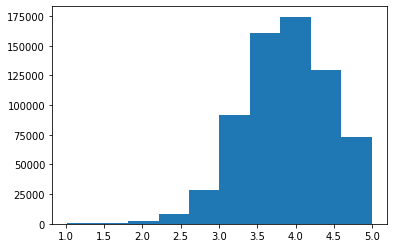

In [286]:
pred=pred.rename('score')
print(pred)
len(pred)
plt.hist(pred)
#pred.to_csv('submission_xgbclassifier.csv')

In [153]:
pred_log_reg=pd.read_csv('submission_logistic_reg.csv')
print()


In [228]:
pred=pred.rename('score')
print(pred)
len(pred)



0         3.539806
1         3.884790
2         3.491531
3         3.311743
4         4.248430
            ...   
670676    3.065740
670677    4.605845
670678    3.801322
670679    4.500572
670680    2.579509
Name: score, Length: 670681, dtype: float64


670681

In [226]:
xg_reg = xgb.XGBRegressor()

In [227]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [233]:
pred_xg_reg = xg_reg.predict(x_test)
pred_xg_reg[pred_xg_reg<1]=1
pred_xg_reg[pred_xg_reg>5]=5

In [234]:
print(pred_xg_reg.max())
print(pred_xg_reg.min())
mean_squared_error(y_test, pred_xg_reg)

5.0
1.0


0.7860465942281718

0         3.432601
1         3.377269
2         3.574456
3         3.344376
4         3.542889
            ...   
670676    3.168944
670677    3.363195
670678    3.555832
670679    3.856624
670680    3.170150
Name: score, Length: 670681, dtype: float64


670681